In [1]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import matplotlib
import scipy
import numpy as np
import seaborn as sns


In [3]:
#date	location	new_cases	new_deaths	total_cases	total_deaths
CVD = pd.read_csv('https://covid.ourworldindata.org/data/ecdc/full_data.csv')
#print(CVD.head())
#print(CVD.dtypes)

In [4]:
#dateFormat = '%Y-%m-%d'
# Convert string values of date to datetime format
CVD['date'] = [dt.datetime.strptime(x,'%Y-%m-%d') for x in CVD['date']] 
#print(CVD.dtypes)
#Check for missing data
#print(CVD.isnull().sum()) #No missing data

In [7]:
#Change column titles to something appropriate
CVD.columns = ['Date', 'Country', 'New Cases', 'New deaths', 'Total Cases', 'Total Deaths' ]

In [8]:
#Select all countries except for china and World
CVD_no_china = CVD.loc[~(CVD['Country'].isin(["China", "World"]))]

In [9]:
#Group them by location and date, select only total cases and deaths for closer observation
#Reset index because groupby by default makes grouped columns indices
CVD_no_china = pd.DataFrame(CVD_no_china.groupby(['Country', 'Date'])['Total Cases', 'Total Deaths'].sum()).reset_index()
#print(CVD_no_china)

In [10]:
#Sort values by each country and by date - descending. Easy to interpret plots
CVD_no_china = CVD_no_china.sort_values(by = ['Country','Date'], ascending=False)
#print(CVD_no_china)

In [12]:
#PREDICTION

def plot_exponential_fit_data(d_df, title, delta):
    d_df = d_df.sort_values(by=['Date'], ascending=True)
    d_df['x'] = np.arange(len(d_df)) + 1  #Add column x to the dataframe 
    d_df['y'] = d_df['Total Cases']   #Add column y to the dataframe 

    x = d_df['x'][:-delta]  #Remove delta number of data points (so we can predict them)
    y = d_df['y'][:-delta]  #Remove delta number of data points (so we can predict them)

#Use non-linear least squares to fit a function, f, to data.
#Let us fit data to exponential function: #y = Ae^(Bt)
    
    c2 = scipy.optimize.curve_fit(lambda t, a, b: a*np.exp(b*t),  x,  y,  p0=(20, 0.2)) 
# Function: lambda t, a, b: a*np.exp(b*t)
# xm y and po for initial values. 
    
    A, B = c2[0]  #Coefficients
    print(f'(y = Ae^(Bx)) A: {A}, B: {B}\n')
    x = range(1,d_df.shape[0] + 1)
    y_fit = A * np.exp(B * x)
#    print(y_fit)
    f, ax = plt.subplots(1,1, figsize=(12,6))
    g = sns.scatterplot(x=d_df['x'][:-delta], y=d_df['y'][:-delta], label='Confirmed cases (used for model creation)', color='red')
    g = sns.scatterplot(x=d_df['x'][-delta:], y=d_df['y'][-delta:], label='Confirmed cases (not used for model, validation)', color='blue')
    g = sns.lineplot(x=x, y=y_fit, label='Predicted values', color='green')  #Predicted
    x_future=range(85,95) #As of 24 March 2020 we have 85 days of info. 
    y_future=A * np.exp(B * x_future)
    print("Expected cases for the next 10 days: \n", y_future)
    plt.xlabel('Days since first case')
    plt.ylabel(f'Total cases')
    plt.title(f'Confirmed cases & projected cases: {title}')
    plt.xticks(rotation=90)
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()
    

In [13]:
CVD_USA = CVD_no_china[CVD_no_china['Country']=='United States']
CVD_Italy = CVD_no_china[CVD_no_china['Country']=='Italy']
CVD_South_Korea = CVD_no_china[CVD_no_china['Country']=='South Korea']
CVD_India = CVD_no_china[CVD_no_china['Country']=='India']
CVD_Germany = CVD_no_china[CVD_no_china['Country']=='Germany']
CVD_Spain = CVD_no_china[CVD_no_china['Country']=='Spain']
CVD_UK = CVD_no_china[CVD_no_china['Country']=='United Kingdom']

(y = Ae^(Bx)) A: 588.314438088797, B: 0.06338370846528243

Expected cases for the next 10 days: 
 [128653.34049976 137071.84612732 146041.22153195 155597.51319562
 165779.12632267 176626.97918415 188184.6675618  200498.63995252
 213618.38423744 227596.62656576]


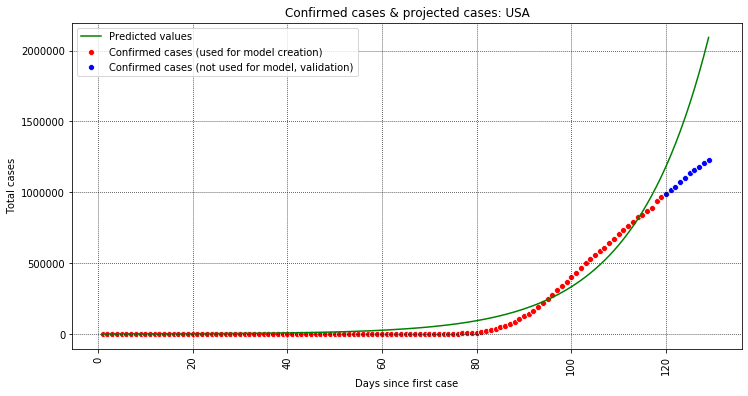

In [15]:
d_df = CVD_USA.copy()
plot_exponential_fit_data(d_df, 'USA', 10)

(y = Ae^(Bx)) A: 0.6672697331670234, B: 0.09084102223720862

Expected cases for the next 10 days: 
 [1505.56868997 1648.74058749 1805.52740166 1977.22384158 2165.24773653
 2371.15174417 2596.63617192 2843.56301782 3113.97134637 3410.09412671]


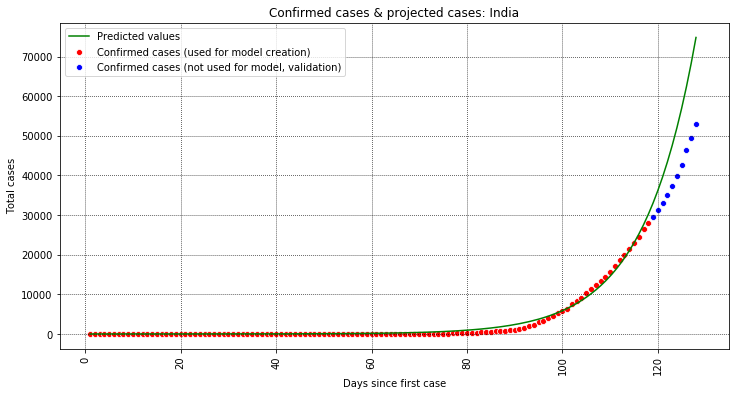

In [14]:
d_df = CVD_India.copy()
plot_exponential_fit_data(d_df, 'India', 10)

(y = Ae^(Bx)) A: 659.0834270922319, B: 0.047744829062620446

Expected cases for the next 10 days: 
 [38145.40536092 40010.82903667 41967.4774735  44019.81183331
 46172.51144206 48430.48445868 50798.87906565 53283.09520687
 55888.79689954 58621.92514813]


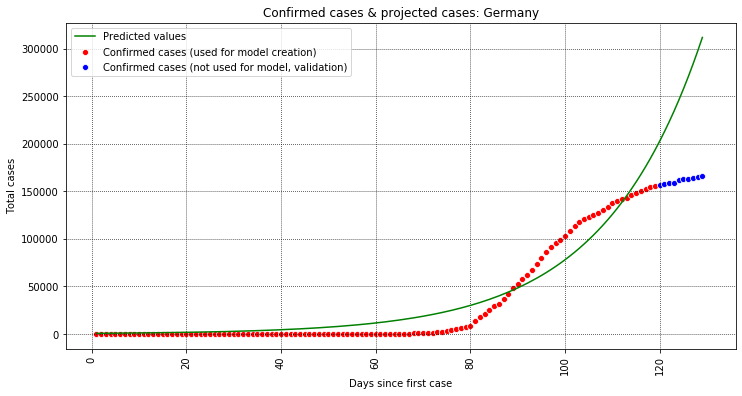

In [16]:
d_df = CVD_Germany.copy()
plot_exponential_fit_data(d_df, 'Germany', 10)

(y = Ae^(Bx)) A: 1669.1000824187372, B: 0.041773322379583984

Expected cases for the next 10 days: 
 [58149.48430956 60630.03109968 63216.3933145  65913.08483947
 68724.81211388 71656.48234475 74713.21207128 77900.33609454
 81223.41678809 84688.2538058 ]


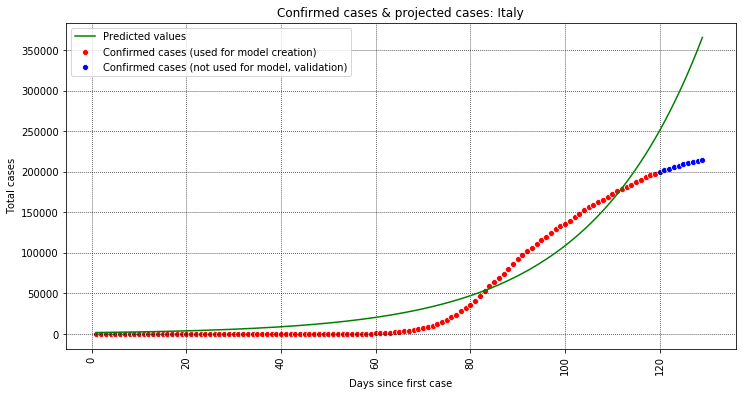

In [17]:
d_df = CVD_Italy.copy()
plot_exponential_fit_data(d_df, 'Italy', 10)

(y = Ae^(Bx)) A: 859.7019242549698, B: 0.02368994930899253

Expected cases for the next 10 days: 
 [6439.66256334 6594.03921072 6752.1166963  6913.9837395  7079.73118654
 7249.45206154 7423.24161861 7601.19739541 7783.41926782 7970.00950603]


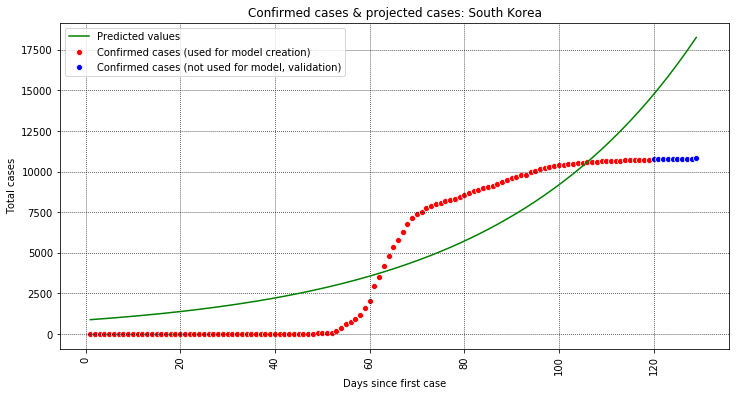

In [18]:
d_df = CVD_South_Korea.copy()
plot_exponential_fit_data(d_df, 'South Korea', 10)

(y = Ae^(Bx)) A: 770.4877899586609, B: 0.04930472685914275

Expected cases for the next 10 days: 
 [50915.64846519 53488.94722495 56192.30161018 59032.28468809
 62015.80173154 65150.10700884 68442.82142215 71901.9510373
 75535.90655013 79353.52373664]


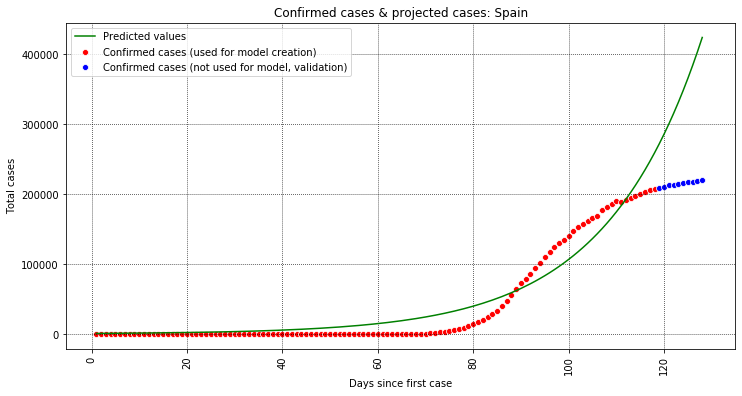

In [19]:
d_df = CVD_Spain.copy()
plot_exponential_fit_data(d_df, 'Spain', 10)

(y = Ae^(Bx)) A: 63.64085254031649, B: 0.06658699404799527

Expected cases for the next 10 days: 
 [18272.45646402 19530.58715744 20875.34511113 22312.6949536
 23849.01200158 25491.11053748 27246.27403396 29122.28745947
 31127.47180826 33270.72100782]


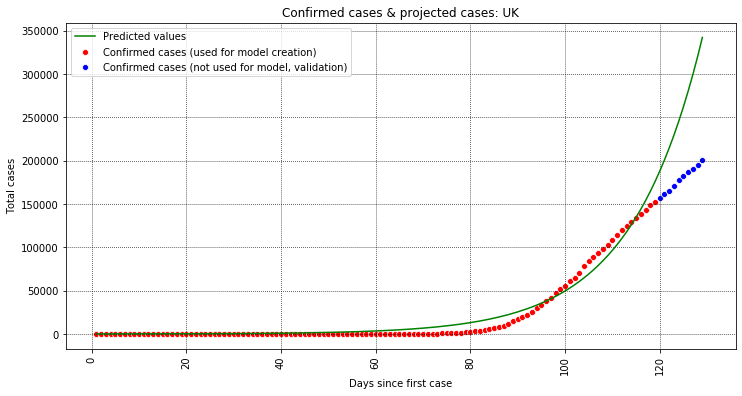

In [20]:
d_df = CVD_UK.copy()
plot_exponential_fit_data(d_df, 'UK', 10)